In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load Data and Cleaning Data
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", skipinitialspace=True)
dataset = dataset.rename(columns={'39': 'Age', 'State-gov': 'WorkClass', '77516': 'fnlwgt', ' Bachelors': 'Education', 'Never-married': 'Marriage Status', 'Adm-clerical': 'Occupation', 'Not-in-family': 'Relationship', 'White': 'Race', 'Male': 'Gender', '2174': 'Capital Gain', ' 0': 'Capital Loss', '40': 'Hours Worked Per Week', 'United-States': 'Country of Origin', '<=50K': 'Income'})
dataset.fillna(np.nan)
dataset.shape
dataset.head()
dataset.columns
dataset.dtypes
dataset['Income'] = dataset["Income"].map({'<=50K': 1, '>50K': 0})
dataset['Gender'] = dataset["Gender"].map({'Male': 1, 'Female': 0})



,Age,WorkClass,fnlwgt,Bachelors,13,Marriage Status,Occupation,Relationship,Race,Gender,Capital Gain,0,Hours Worked Per Week,Country of Origin,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [28]:
def load_and_process(url_or_path_to_csv_file):
    dataset = (
        pd.read_csv(url_or_path_to_csv_file, skipinitialspace=True)
           .rename(columns={'39': 'Age', 'State-gov': 'WorkClass', '77516': 'fnlwgt', ' Bachelors': 'Education', 'Never-married': 'Marriage Status', 'Adm-clerical': 'Occupation', 'Not-in-family': 'Relationship', 'White': 'Race', 'Male': 'Gender', '2174': 'Capital Gain', ' 0': 'Capital Loss', '40': 'Hours Worked Per Week', 'United-States': 'Country of Origin', '<=50K': 'Income'})
            
    )
    dataset['Income'] = dataset["Income"].map({'<=50K': 1, '>50K': 0})
    dataset['Gender'] = dataset["Gender"].map({'Male': 1, 'Female': 0})
    return dataset
        
    

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='count'>

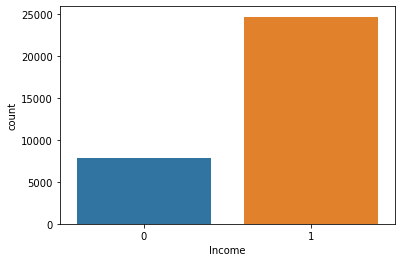

In [29]:
#Data Processing
dataset = load_and_process("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")
sns.countplot(dataset['Income'],label="Income Distribution")

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

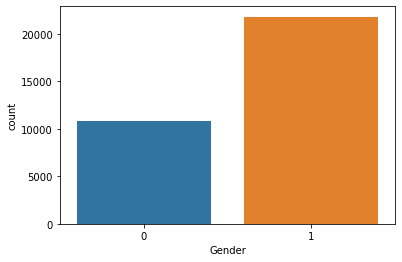

In [ ]:
#Data Processing

sns.countplot(dataset['Gender'],label="Gender Distribution")

/opt/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

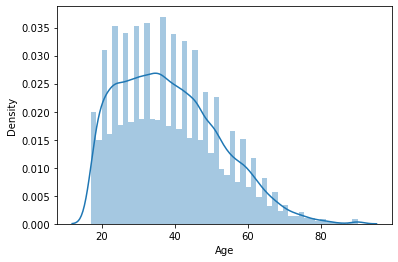

In [ ]:
sns.distplot(dataset["Age"])

# Analysis Pipeline
The question I want to research is wether Income and Gender are correlated and if age plays a role into this correlation (Do older women make more that youger men? Vice-Versa)
To try to tackle this question I plotted the data given and tried to set it up in a way in which I could get a better scope of the data I was using. To do this I plotted a graph which showed the age density in the dataset. This showed that there was a stronger density around middle age people and therefore may make my data on older people less reliable since there is a smaller pool of data to analyse. As per the Gender graphs I wanted to see if they were directly proportional which in this Census data, it was not. There were almost double the amount of men than women in the pool. With the under representation of women the data may not be as precise as I would like. The income graph tells the same story, there is an over representation is people making over 50k. Observing the gender and income graphs we can see that the highest representation is of males and making over 50k which could represent the possibility of men making more than women. 

Notes:
Had to re-write first line to catagorize the data columns, therefore removing 1 person which would be a negligible change since there are over 30,000 people in the dataset.
skipinitialspace=True : This line of code had to be added in after the filtering process for finding income over and below 50k kept returning NaN.
